<a href="https://colab.research.google.com/github/Thiagothims/ml_wine/blob/dev/wine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas utilizadas ao longo do desenvolvimento do proejto

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split

Carregamento dos dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/winemag-data_first150k.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


Avaliar o cabeçalho do dataset

In [3]:
print(df.head())

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Visualizar o tamanho da matrix

In [4]:
print(df.shape)

(150930, 11)


Após analisar o tamanho do dataset, obter uma amostra é uma abordagem recomendada, considerando principalmente a capacidade computacional necessária para lidar com os processos necessários apra analise e predição dos resultados

In [5]:
df_sample = df.sample(frac=0.3, random_state=123)

print(df_sample.shape)

(45279, 11)


Camparação do tamanho da amostra

In [6]:
print('Total de registro: ' + str(df.shape[0]))
print('Amostragem de 30%: ' + str(df_sample.shape[0]))

Total de registro: 150930
Amostragem de 30%: 45279


Informações sobre os dados quanto seu tamanho em MB, tipo dos dados de cada coluna

In [7]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45279 entries, 90289 to 10552
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   45279 non-null  int64  
 1   country      45278 non-null  object 
 2   description  45279 non-null  object 
 3   designation  31669 non-null  object 
 4   points       45279 non-null  int64  
 5   price        41174 non-null  float64
 6   province     45278 non-null  object 
 7   region_1     37736 non-null  object 
 8   region_2     18320 non-null  object 
 9   variety      45279 non-null  object 
 10  winery       45279 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.1+ MB
None


Após avaliação de foco das analises, houve a decisão de retirar algumas colunas que neste momento atrapalhariam na questão conputacional e gerariam alguns ruidos desnecessários

In [8]:
df_sample = df_sample.drop(['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'winery'], axis=1)
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45279 entries, 90289 to 10552
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   45278 non-null  object 
 1   points    45279 non-null  int64  
 2   price     41174 non-null  float64
 3   province  45278 non-null  object 
 4   variety   45279 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


Verificação de dados nulos na amostra

In [9]:
print(df_sample.isnull().sum())

country        1
points         0
price       4105
province       1
variety        0
dtype: int64


Exclusão dos dados nulos e comparação do restante da amostra

In [10]:
df_sample_cleaned = df_sample.dropna()
excluded = len(df_sample) - len(df_sample_cleaned)

print('Quantidade de dados excluidos: ' + str(excluded))
print('Quantidade de dados restantes: ' + str(len(df_sample_cleaned)) + '\n')

# Verificar se ainda exietem dados nulos
print(df_sample_cleaned.isnull().sum())

Quantidade de dados excluidos: 4106
Quantidade de dados restantes: 41173

country     0
points      0
price       0
province    0
variety     0
dtype: int64


Percentual atual da amostra

In [11]:
total = df.shape[0]
value_old = df_sample.shape[0]
value_new = df_sample_cleaned.shape[0]

print('Tamanho total do dataset: ' + str(total))
print('Tamanho da amostra: ' + str(value_old))
print('Tamanho da amostra após exclusão dos nulos: ' + str(value_new) + '\n')

percent_df_sample = (value_new * 100) / total
print('Percentual da amostra após exclusão dos nulos: {:.2f}%'.format(percent_df_sample))

Tamanho total do dataset: 150930
Tamanho da amostra: 45279
Tamanho da amostra após exclusão dos nulos: 41173

Percentual da amostra após exclusão dos nulos: 27.28%


Redefinindo a variável dos dados para ter mais clareza

In [12]:
df = df_sample_cleaned

In [13]:
print(df.head())

           country  points  price         province          variety
90289    Australia      93  110.0  South Australia            Syrah
96312  New Zealand      91   20.0      Marlborough  Sauvignon Blanc
25520        Spain      87   34.0   Northern Spain      Tempranillo
86206    Argentina      87   13.0            Other        Torrontés
96887           US      85   25.0       California       Chardonnay


In [14]:
print(df.shape)

(41173, 5)


In [15]:
print(df.describe())

             points         price
count  41173.000000  41173.000000
mean      87.796323     33.070216
std        3.214958     35.856560
min       80.000000      4.000000
25%       86.000000     16.000000
50%       88.000000     24.000000
75%       90.000000     40.000000
max      100.000000   1400.000000


Etapa de escalonamento e categorização

In [16]:
# Selecionar colunas relevantes para realizar escalonamento
numeric_columns = ['points', 'price']

scaler = StandardScaler()

df_copy = df.copy()

print("Dados não escalonados:")
print(df_copy[numeric_columns].head())

# Escalonar as colunas selecionadas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDados escalonados:")
print(df[numeric_columns].head())

Dados não escalonados:
       points  price
90289      93  110.0
96312      91   20.0
25520      87   34.0
86206      87   13.0
96887      85   25.0

Dados escalonados:
         points     price
90289  1.618603  2.145513
96312  0.996503 -0.364518
25520 -0.247696  0.025931
86206 -0.247696 -0.559743
96887 -0.869796 -0.225072


<ipython-input-16-4afe1524b0ab>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [17]:
print(df.head())

           country    points     price         province          variety
90289    Australia  1.618603  2.145513  South Australia            Syrah
96312  New Zealand  0.996503 -0.364518      Marlborough  Sauvignon Blanc
25520        Spain -0.247696  0.025931   Northern Spain      Tempranillo
86206    Argentina -0.247696 -0.559743            Other        Torrontés
96887           US -0.869796 -0.225072       California       Chardonnay


In [18]:
# Categorização Ordinal
string_columns = ['country', 'province', 'variety']

ordinal_encoder = OrdinalEncoder()
df_encoded = df.copy()

df_encoded[string_columns] = ordinal_encoder.fit_transform(df[string_columns])

df = df_encoded

print(df.head())

       country    points     price  province  variety
90289      2.0  1.618603  2.145513     289.0    386.0
96312     29.0  0.996503 -0.364518     173.0    351.0
25520     36.0 -0.247696  0.025931     220.0    403.0
86206      1.0 -0.247696 -0.559743     227.0    424.0
96887     38.0 -0.869796 -0.225072      48.0     88.0


Matrix de Correlação

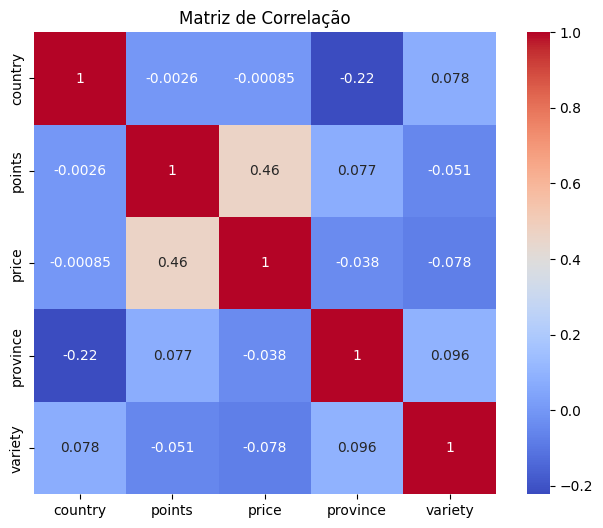

In [19]:
# Selecionar apenas as variáveis numéricas
numeric_vars = ['country', 'points', 'price', 'province', 'variety']

# Calcular a matriz de correlação
corr_matrix = df[numeric_vars].corr()

# Visualizar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

Visualização do método do "cotovelo"

12345678910

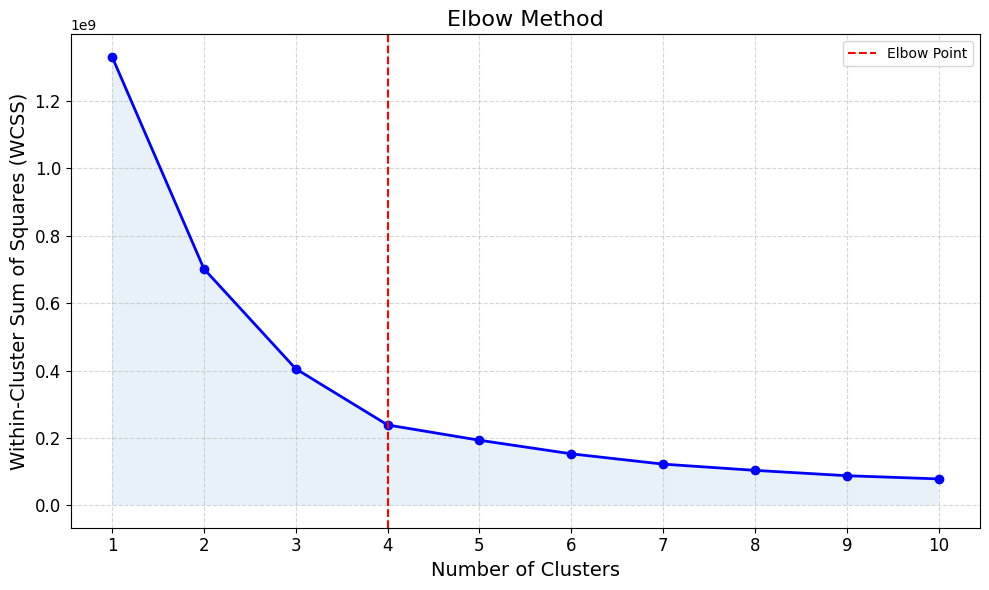

In [20]:
wcss = []

k_range = range(1, 11)

for k in k_range:
    print(k,end="")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', color='blue', linestyle='-', linewidth=2)
plt.axvline(x=4, color='red', linestyle='--', label='Elbow Point')
plt.fill_between(k_range, wcss, alpha=0.1)

plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)
plt.xticks(k_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

Treinamento dos dados com algoritimo K-means

In [21]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(df)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [22]:
# Obter os rótulos dos clusters atribuídos a cada ponto de dados
labels = kmeans.labels_

In [23]:
# Adicionar os rótulos dos clusters ao DataFrame original
df['Cluster'] = labels

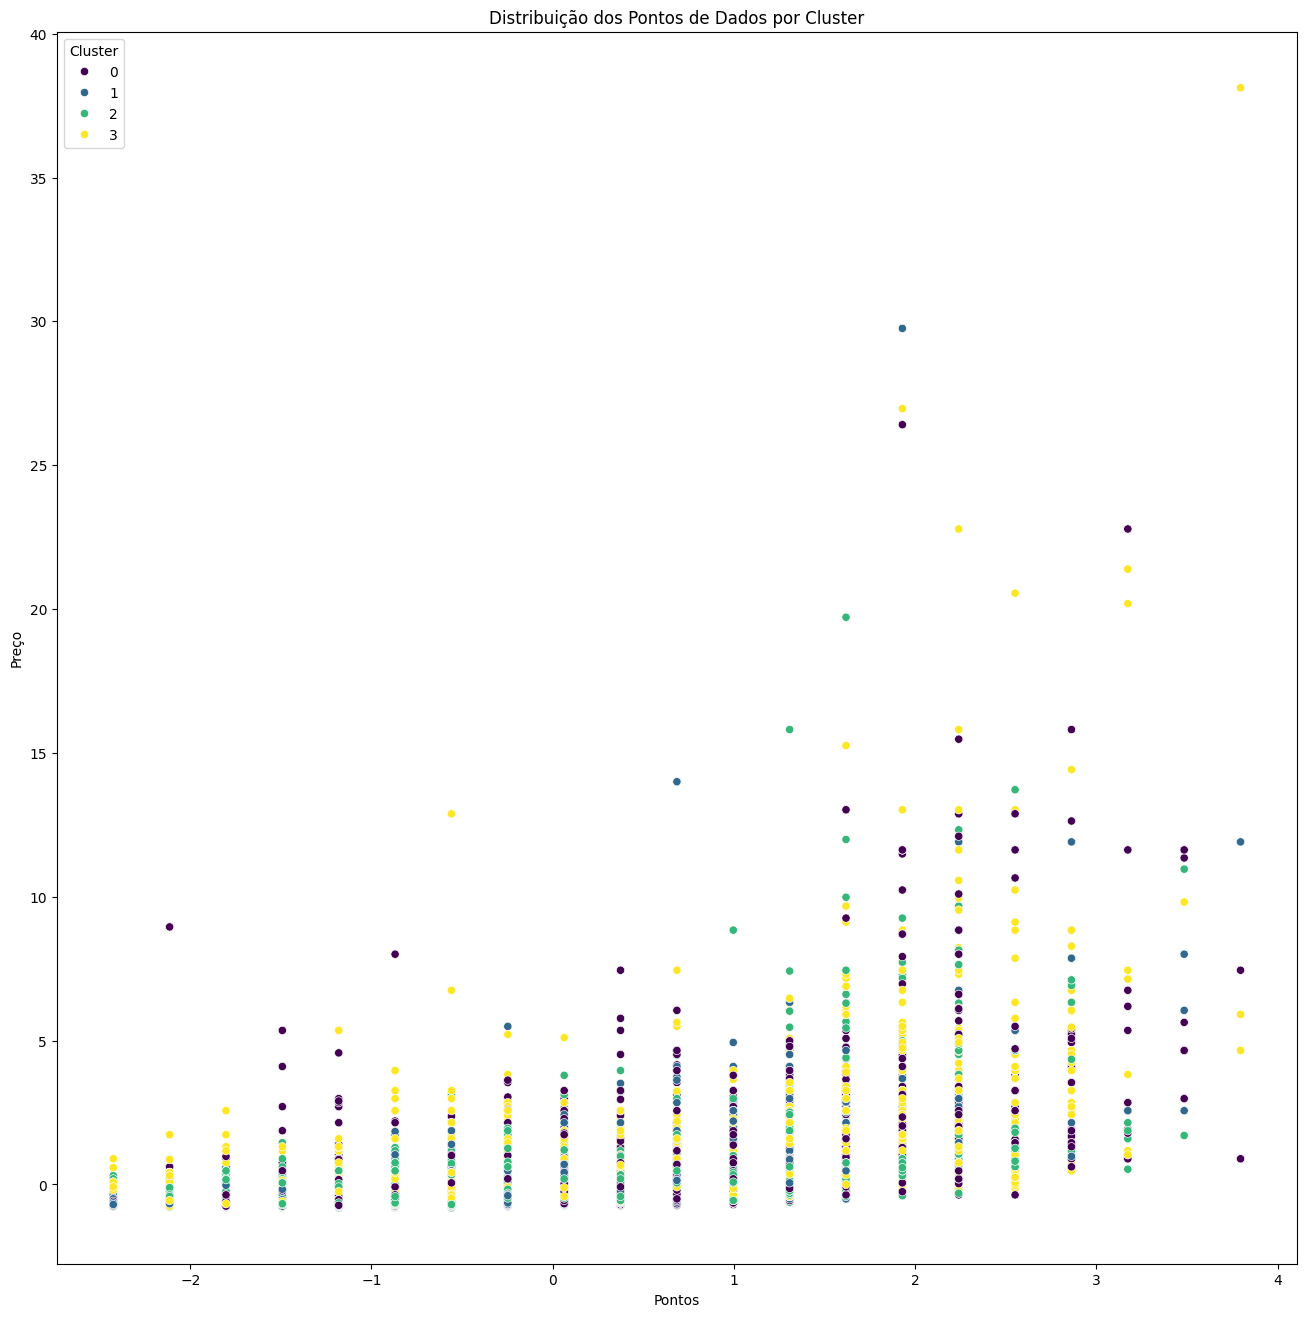

In [24]:
# Visualizar a distribuição dos pontos de dados em cada cluster
plt.figure(figsize=(16, 16))
sns.scatterplot(data=df, x='points', y='price', hue='Cluster', palette='viridis')
plt.title('Distribuição dos Pontos de Dados por Cluster')
plt.xlabel('Pontos')
plt.ylabel('Preço')
plt.show()

In [25]:
# Analisar as características de cada cluster
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}:")
    print("Tamanho do cluster:", len(cluster_data))
    print("Média de pontos:", cluster_data['points'].mean())
    print("Média de preço:", cluster_data['price'].mean())
    print("País mais frequente:", cluster_data['country'].mode()[0])
    print("Província mais frequente:", cluster_data['province'].mode()[0])
    print("Variedade mais frequente:", cluster_data['variety'].mode()[0])
    print("---")

Cluster 0:
Tamanho do cluster: 12432
Média de pontos: 0.09407842326535104
Média de preço: 0.005700503991213738
País mais frequente: 19.0
Província mais frequente: 325.0
Variedade mais frequente: 323.0
---
Cluster 1:
Tamanho do cluster: 7442
Média de pontos: -0.05948627313536793
Média de preço: -0.15300686224328605
País mais frequente: 38.0
Província mais frequente: 358.0
Variedade mais frequente: 53.0
---
Cluster 2:
Tamanho do cluster: 12668
Média de pontos: -0.1238457989070583
Média de preço: -0.07250034064940336
País mais frequente: 38.0
Província mais frequente: 48.0
Variedade mais frequente: 300.0
---
Cluster 3:
Tamanho do cluster: 8631
Média de pontos: 0.09755445107092917
Média de preço: 0.23012892116121053
País mais frequente: 38.0
Província mais frequente: 48.0
Variedade mais frequente: 88.0
---


In [26]:
# Avaliar a qualidade dos clusters usando a métrica silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5493985101773524


Gráfico de dispersão com múltiplas variáveis

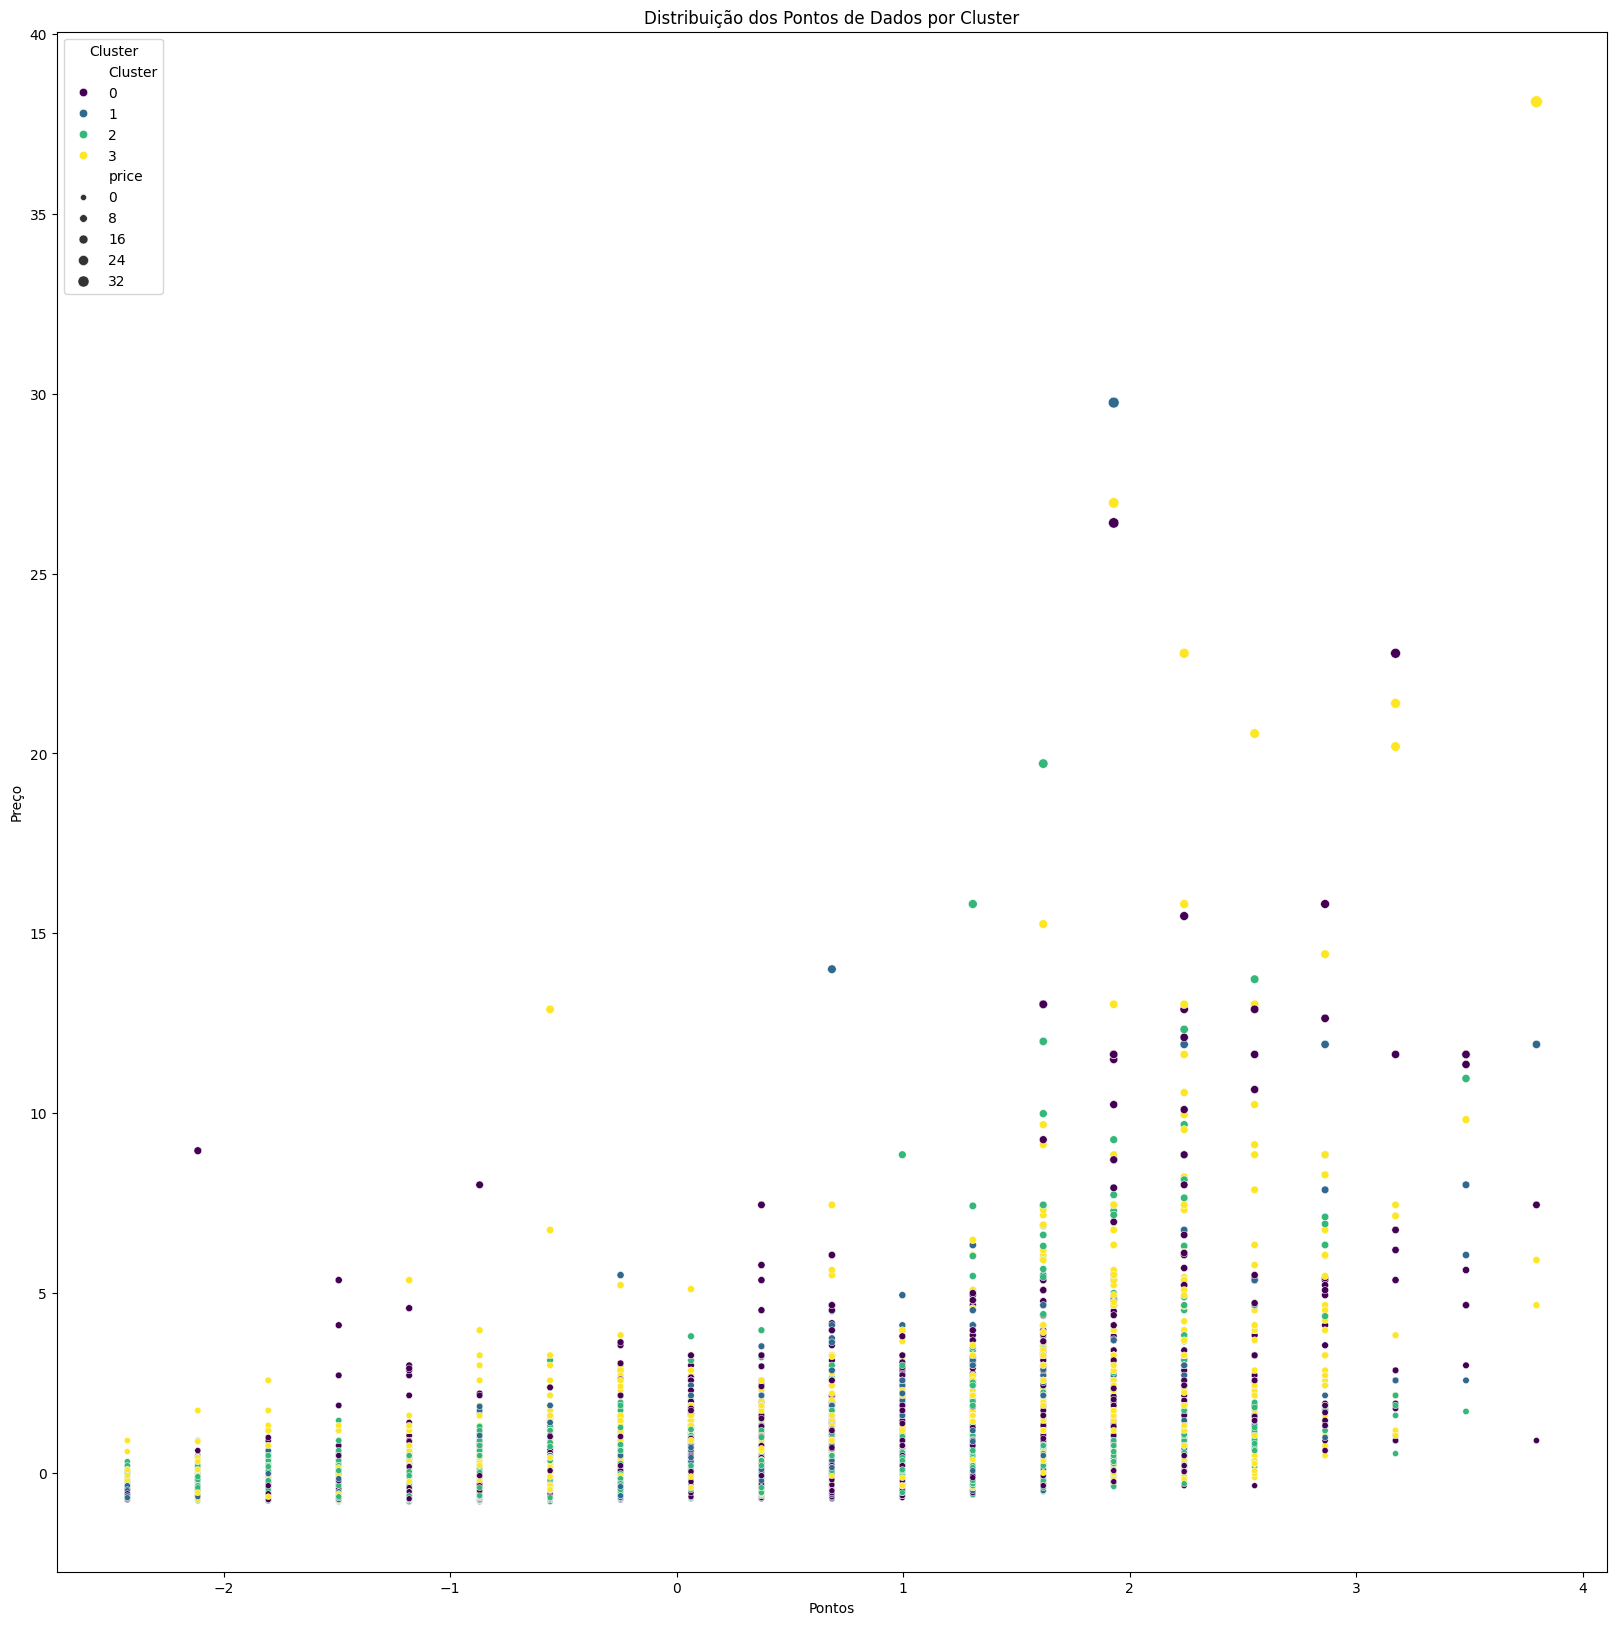

In [27]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='points', y='price', hue='Cluster', size='price', palette='viridis')
plt.title('Distribuição dos Pontos de Dados por Cluster')
plt.xlabel('Pontos')
plt.ylabel('Preço')
plt.legend(title='Cluster', loc='upper left')
plt.show()

Gráfico de dispersão 3D

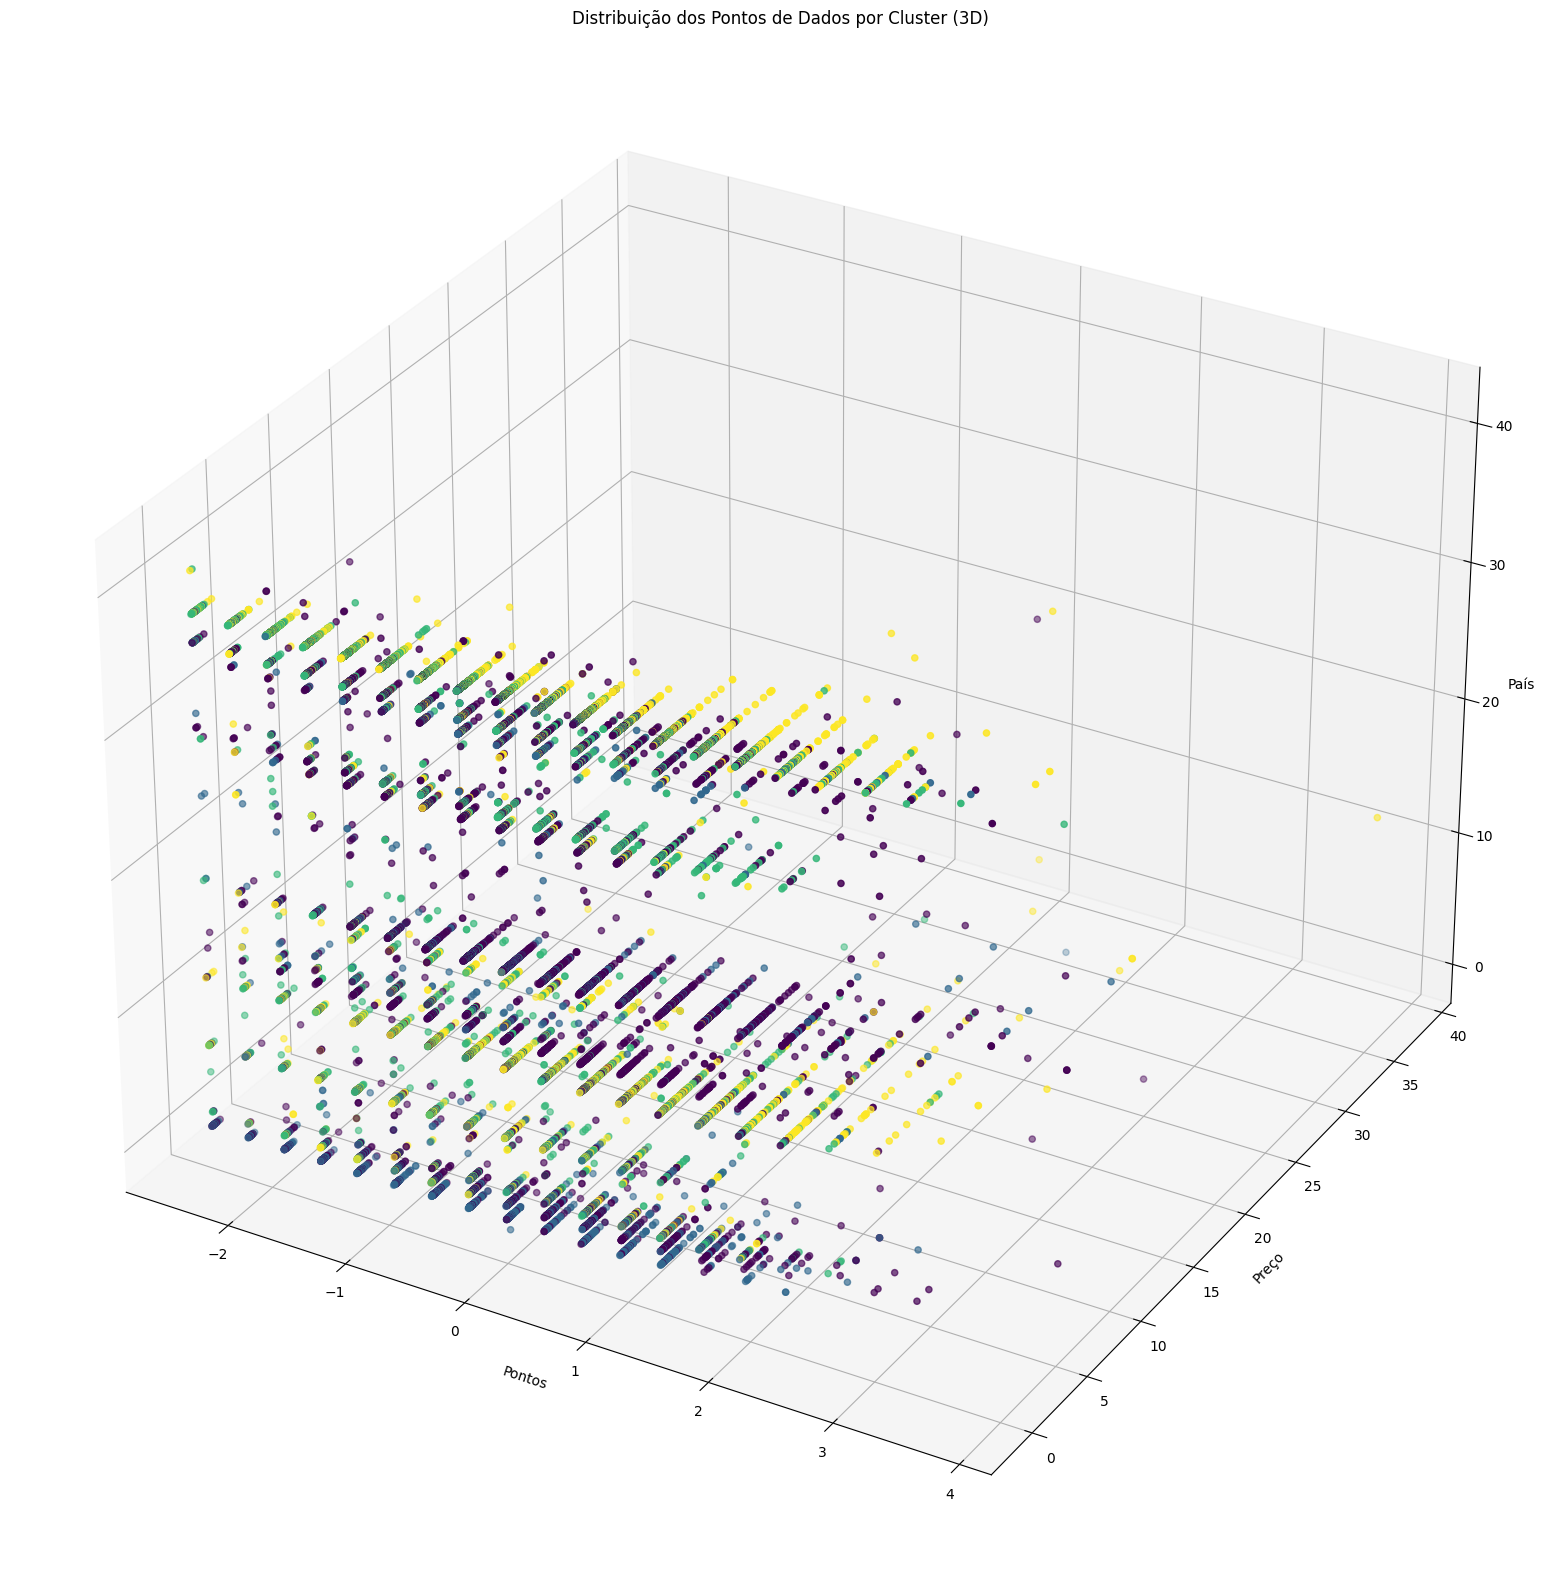

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['points'], df['price'], df['country'], c=labels, cmap='viridis')
ax.set_xlabel('Pontos')
ax.set_ylabel('Preço')
ax.set_zlabel('País')
plt.title('Distribuição dos Pontos de Dados por Cluster (3D)')
plt.show()

Gráfico de barras para análise de características

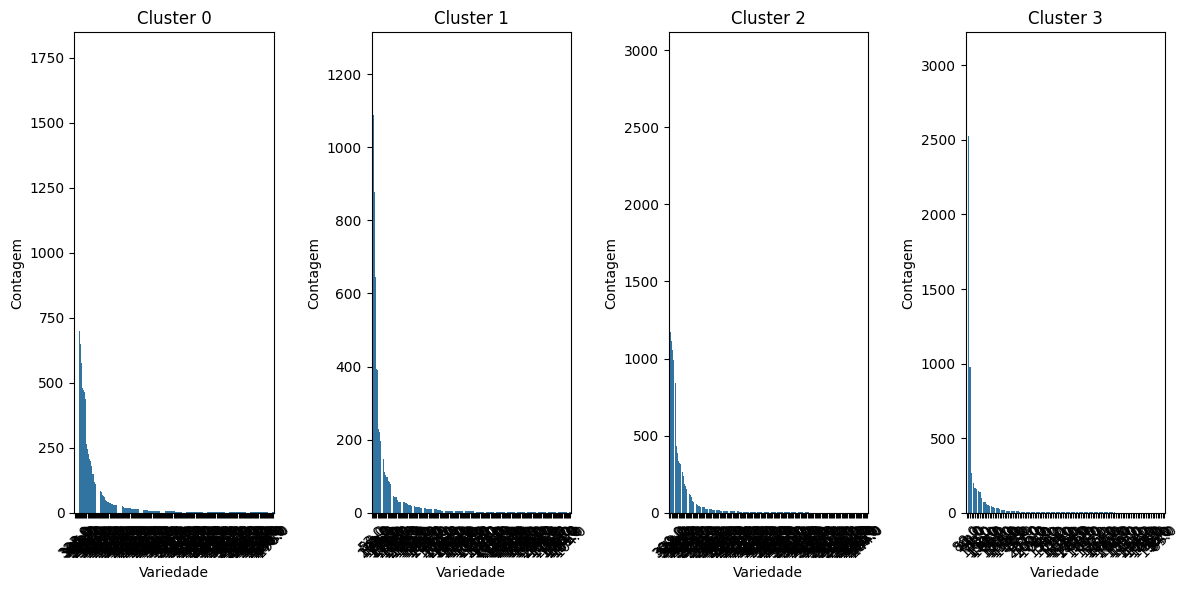

In [29]:
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.subplot(1, n_clusters, i+1)
    sns.countplot(x='variety', data=cluster_data, order=cluster_data['variety'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Cluster {i}')
    plt.xlabel('Variedade')
    plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

Gráfico de violino para análise de distribuição PREÇO

<ipython-input-30-4621835ceaa1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='price', data=df, palette='viridis')


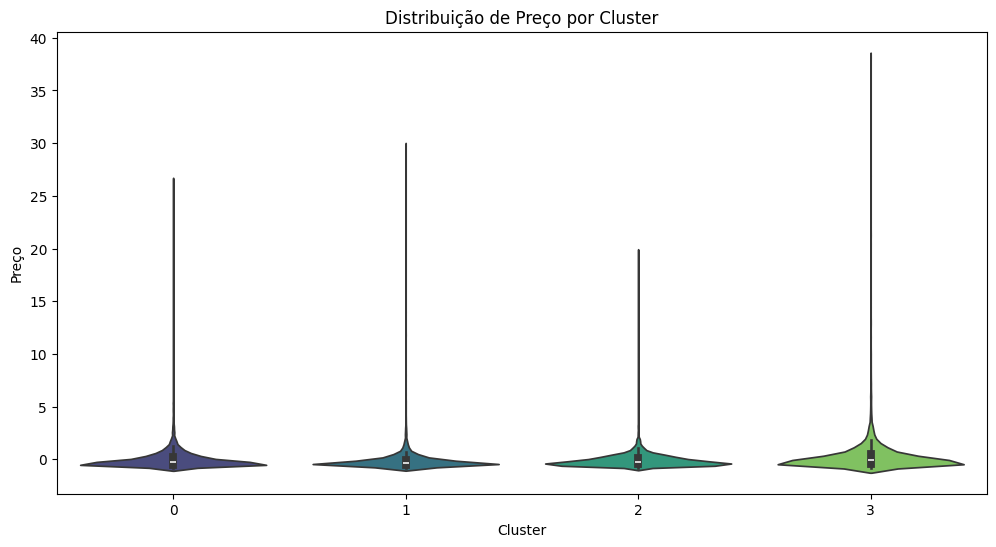

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='price', data=df, palette='viridis')
plt.title('Distribuição de Preço por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Preço')
plt.show()

Gráfico de violino para análise de distribuição PONTOS

<ipython-input-31-9e9fa2ba21ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='points', data=df, palette='viridis')


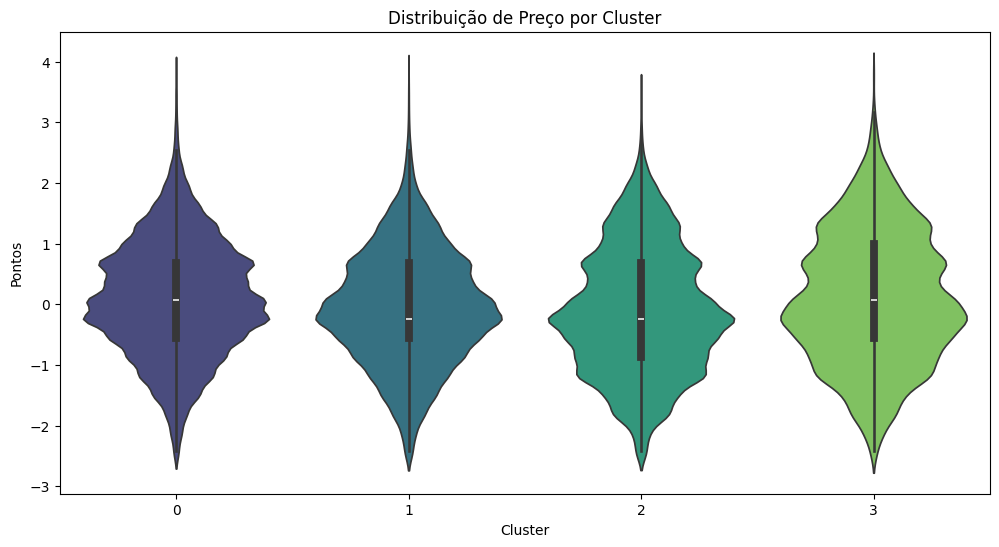

In [31]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='points', data=df, palette='viridis')
plt.title('Distribuição de Preço por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Pontos')
plt.show()

Analise da relação Preço X Qualidade

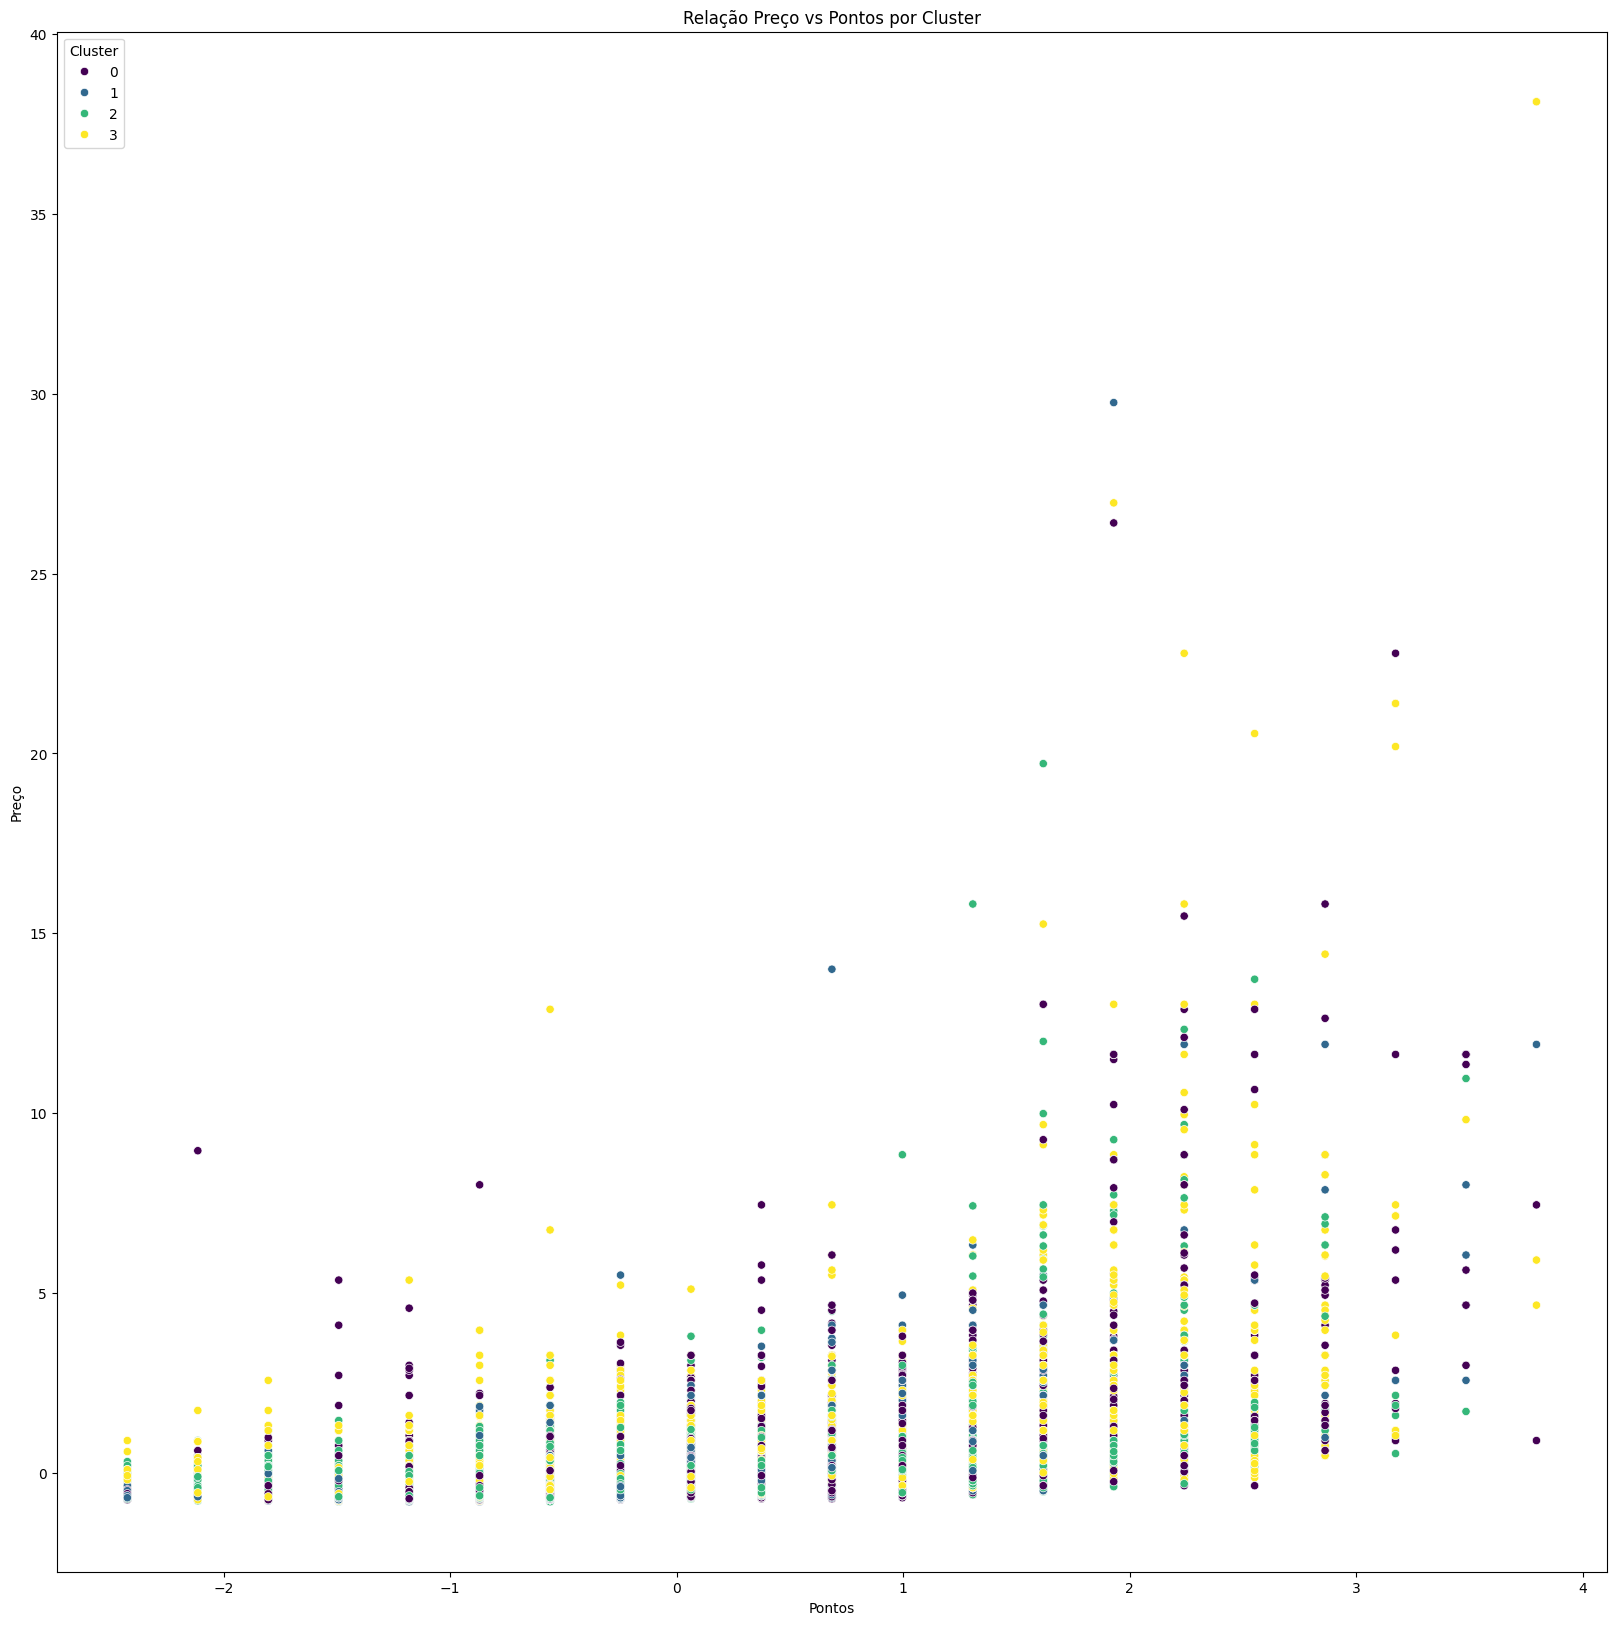

In [32]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='points', y='price', hue='Cluster', palette='viridis')
plt.title('Relação Preço vs Pontos por Cluster')
plt.xlabel('Pontos')
plt.ylabel('Preço')
plt.legend(title='Cluster', loc='upper left')
plt.show()

Gráfico de densidade

<Figure size 2000x2000 with 0 Axes>

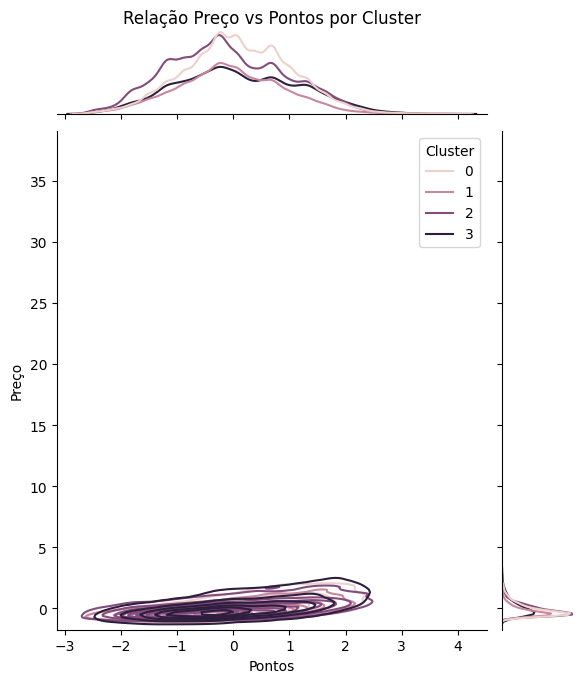

In [38]:
plt.figure(figsize=(20, 20))
sns.jointplot(data=df, x='points', y='price', hue='Cluster', kind='kde')
plt.subplots_adjust(top=1.1)  # Ajusta o espaçamento vertical
plt.title('Relação Preço vs Pontos por Cluster', loc='center', y=1.2)  # Ajusta a posição do título
plt.xlabel('Pontos')
plt.ylabel('Preço')
plt.show()

Gráfico de coordenadas paralelas

<ipython-input-39-9fb92b1e9693>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Cluster'] = df_plot['Cluster'].astype('category')


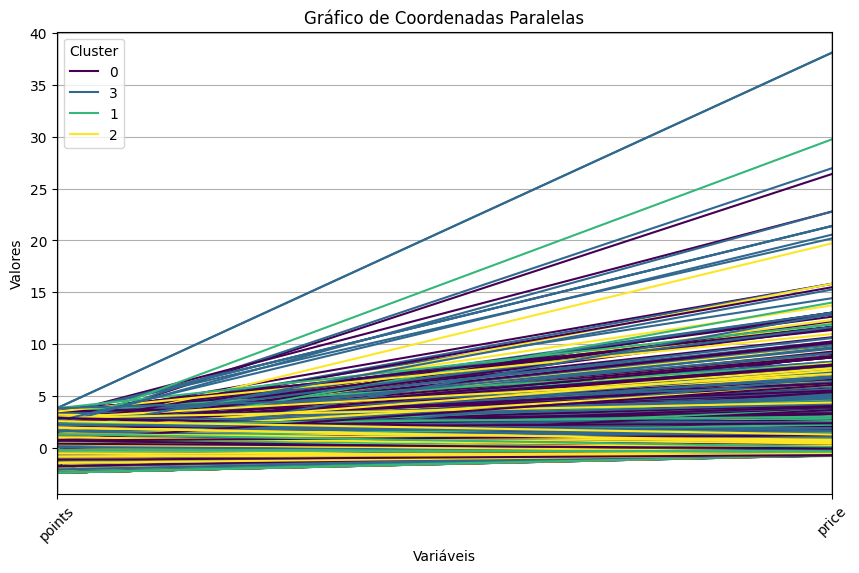

In [39]:
# Selecionar as variáveis de interesse
vars_to_plot = ['points', 'price', 'Cluster']  # Adicione outras variáveis, se desejar

# Criar um DataFrame com as variáveis selecionadas
df_plot = df[vars_to_plot]

# Converter a variável 'Cluster' para uma categoria
df_plot['Cluster'] = df_plot['Cluster'].astype('category')

# Criar o gráfico de coordenadas paralelas
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df_plot, 'Cluster', colormap='viridis')
plt.title('Gráfico de Coordenadas Paralelas')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='best')
plt.show()